In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pencil as pc
from IPython.display import display, Math, Latex

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
# data = np.loadtxt('stratification.dat')

In [3]:
# plt.plot(data[:,0], data[:,1])
# plt.plot(data[:,0], data[:,2])
# plt.xlim(-0.9*np.pi, 0.1*np.pi)
# # plt.yscale('log')

In [4]:
#reading the grid
grid = pc.read.grid(trim=True, quiet=True)
z = grid.z

In [5]:
ts = pc.read.ts()

Read 16076 lines.


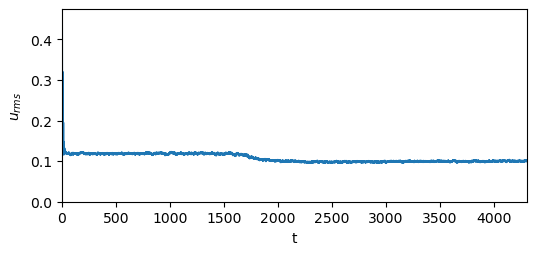

In [6]:
plt.figure(figsize=(6,2.5))
plt.plot(ts.t, ts.urms)
plt.xlim(ts.t[0], ts.t[-1])
plt.ylim(0, )
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [7]:
ts.urms[-1]

0.1014

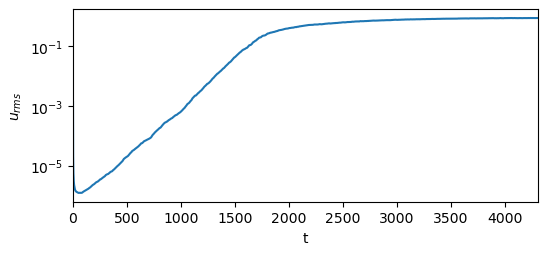

In [8]:
plt.figure(figsize=(6,2.5))
plt.plot(ts.t, ts.brms)
plt.xlim(ts.t[0], ts.t[-1])
plt.yscale('log')
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [9]:
xya = pc.read.aver(plane_list="xy")
pre = xya.xy.ppmz
rho = xya.xy.rhomz
tem = xya.xy.TTmz

In [10]:
data = np.loadtxt('stratification.dat')

In [11]:
# cp

In [12]:
from scipy.integrate import trapezoid

In [13]:
# ss = trapezoid(data[:,2], data[:,0])*gamma/cp
# TT = np.exp(ss)

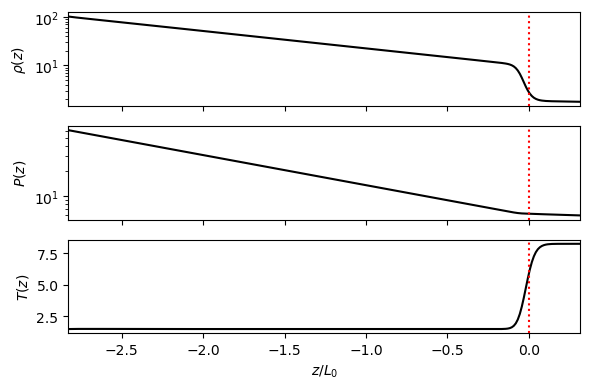

In [14]:
fig, axs = plt.subplots(3,1, figsize=(6,4), sharex=True)

axs[0].plot(z, rho[-1,:], color='k')
axs[1].plot(z, pre[-1,:], color='k')
axs[2].plot(z, tem[-1,:], color='k')
# axs[2].plot(z, data[:,2], color='r')
# axs[2].plot(z, np.exp(data[:,2]*gamma/cp), color='b')
# axs[2].plot(z, TT, color='b')
# axs[2].plot(z, tem[-200,:], color='k')
for i in range(0,3):
    axs[i].axvline(x=0, c='r', ls=':')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[1].set_xlim(z[0], z[-1])
axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")

plt.xlabel(r"$z/L_0$")
plt.tight_layout()
#plt.savefig("variation.jpg")

In [15]:
yaver = pc.read.aver(plane_list='y')

In [16]:
uz_real = yaver.y.uzmxz

In [17]:
uz_real.shape

(10764, 400, 256)

In [18]:
indx_t1 = np.argmin(np.abs(yaver.t - 15))  #to avoid the transient effects below t=40
indx_t2 = np.argmin(np.abs(yaver.t - yaver.t[-1]))

In [19]:
np.shape(yaver.t)

(10764,)

In [20]:
# uz_fourier = mode.FT(uz_real[indx_t1:indx_t2,:,mode.indx_zref], 'ortho')

In [21]:
uz_fourier = np.fft.fftn(uz_real[indx_t1:indx_t2,:,225], s=None, axes=(-2, -1), norm='ortho')
uz_fourier.shape

(10726, 400)

In [22]:
D = 0.17662
logP = np.log(np.abs(uz_fourier)/D**2)

In [23]:
size = np.shape(uz_real)
#size
nx = size[1]
nz = size[2]
nt = size[0]

tt = yaver.t
len(grid.x)

400

In [24]:
param = pc.read.param()

In [25]:
lxyz = param.lxyz   #shape of the box
grz = -param.gravz  #value of g along z direction
gamma = param.gamma
cp = param.cp
lx = lxyz[0]
ly = lxyz[1]
lz = lxyz[2]
lz

3.14159

In [26]:
t_gd = tt[indx_t1:indx_t2]  #time interval where urms has reached a steady state
T = np.max(t_gd)-np.min(t_gd)
t_len = np.size(t_gd)

dkx = 2*np.pi/lx    #unit step along kx direction
dom = 2*np.pi/T #unit step alomg omega direction

In [27]:
if t_len%2 == 0:
    fom = np.arange(0, t_len/2)
    rom = -np.flip(np.arange(1, t_len/2+1))
    om = np.concatenate((fom, rom))*dom
else:
    fom = np.arange(0, t_len/2)
    rom = -np.flip(np.arange(1, t_len/2))
    om = np.concatenate((fom, rom))*dom

In [28]:
if nx%2 == 0:
    fnx = np.arange(0, nx/2)
    rnx = -np.flip(np.arange(1, nx/2+1))
    kx = np.concatenate((fnx, rnx))*dkx
else:
    fnx = np.arange(0, nx/2)
    rnx = -np.flip(np.arange(1, nx/2))
    kx = np.concatenate((fnx, rnx))*dkx

In [29]:
k_tilde = np.fft.fftshift(kx)#*L0
om_tilde = np.fft.fftshift(om)#/omega0
np.shape(om_tilde), np.shape(k_tilde), np.shape(logP)
# k_tilde

((10726,), (400,), (10726, 400))

In [30]:
k_tilde

array([-78.53981634, -78.14711726, -77.75441818, -77.36171909,
       -76.96902001, -76.57632093, -76.18362185, -75.79092277,
       -75.39822369, -75.0055246 , -74.61282552, -74.22012644,
       -73.82742736, -73.43472828, -73.0420292 , -72.64933011,
       -72.25663103, -71.86393195, -71.47123287, -71.07853379,
       -70.68583471, -70.29313562, -69.90043654, -69.50773746,
       -69.11503838, -68.7223393 , -68.32964022, -67.93694113,
       -67.54424205, -67.15154297, -66.75884389, -66.36614481,
       -65.97344573, -65.58074664, -65.18804756, -64.79534848,
       -64.4026494 , -64.00995032, -63.61725124, -63.22455215,
       -62.83185307, -62.43915399, -62.04645491, -61.65375583,
       -61.26105675, -60.86835766, -60.47565858, -60.0829595 ,
       -59.69026042, -59.29756134, -58.90486225, -58.51216317,
       -58.11946409, -57.72676501, -57.33406593, -56.94136685,
       -56.54866776, -56.15596868, -55.7632696 , -55.37057052,
       -54.97787144, -54.58517236, -54.19247327, -53.79

In [31]:
cs_u = 3.154
cs_d = 1.008

Locator attempting to generate 3902 ticks ([-14.125, ..., 5.379999999999999]), which exceeds Locator.MAXTICKS (1000).


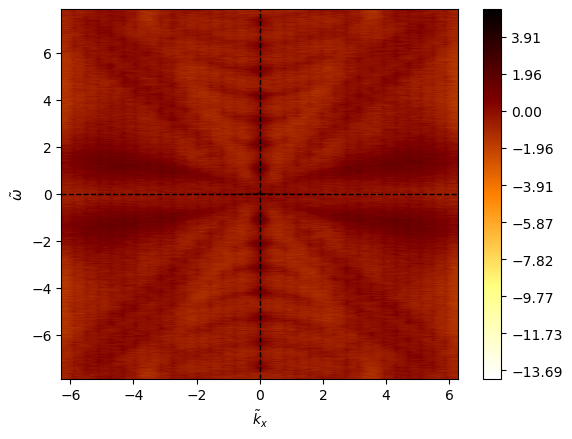

In [32]:
# [X, Y] = np.meshgrid(k_tilde, om_tilde)
# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# # plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=np.min(logP), vmax=np.max(logP))
# # plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=-6, vmax=np.max(logP))
# plt.contourf(X, Y, np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=np.min(logP), vmax=np.max(logP))
# # plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')
# # plt.plot(k_tilde, cs_d*k_tilde, ls='-', c='k')
# # plt.plot(k_tilde, cs_u*k_tilde, ls=':', c='k')
# plt.axvline(x=0, c='k', ls='--', lw=1)
# plt.axhline(y=0, c='k', ls='--', lw=1)
# plt.xlim(-2*np.pi,2*np.pi)
# # plt.ylim(-np.pi,np.pi)
# #plt.ylim(0,10)
# plt.colorbar()
# plt.xlabel(r"$\tilde{k}_x$")
# plt.ylabel(r"$\tilde{\omega}$")
# plt.savefig('plots/k_om4.png')
# plt.show()

In [33]:
def pmodes(kx, n: int):
        """
        Calculate the freq of p-mode.
        n: order of p-modes, 0, 1, 2, 3, ...
        """
        gz = 1
        L0 = 1
        omega0 = 1
        om_sq = gz**2/(2*cs_d)**2+cs_d**2*((kx/L0)**2+((n+0.5)*np.pi/(9*lz/10))**2)
        freq = np.sqrt(om_sq/omega0**2)
        return np.round(freq, 3)

In [34]:
gz = 1
L0 = 1
omega0 = 1

In [35]:
# k_tilde[0:512]
# k_tilde[512:-1]

Locator attempting to generate 3902 ticks ([-14.125, ..., 5.379999999999999]), which exceeds Locator.MAXTICKS (1000).


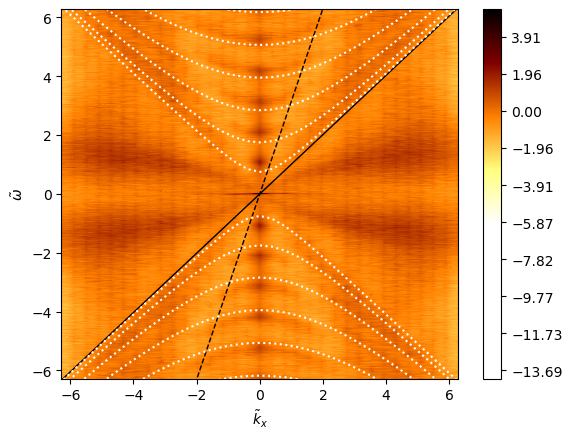

In [36]:
[X, Y] = np.meshgrid(k_tilde, om_tilde)
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=np.min(logP), vmax=np.max(logP))
plt.contourf(X, Y, np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=-6, vmax=np.max(logP))
# plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')
# plt.plot(k_tilde, cs_d*k_tilde, ls='-', c='k')
# plt.plot(k_tilde, cs_u*k_tilde, ls=':', c='k')

plt.plot(k_tilde, cs_d*k_tilde/(omega0*L0), ls='-', c='k', lw=1)
plt.plot(k_tilde, cs_u*k_tilde/(omega0*L0), ls='--', c='k', lw=1)
plt.plot(k_tilde[512:-1], np.sqrt(gz*k_tilde[512:-1]/(omega0*L0)), ls='-.', c='w')
q = 0.106
plt.plot(k_tilde[512:-1], np.sqrt(gz*k_tilde[512:-1]*((1-q)/(1+q))/(omega0*L0)), ls=(0, (3, 1, 1, 1)), c='w')
for i in range(0, 16):
    plt.plot(k_tilde, pmodes(k_tilde, i), c='w', ls=':')
    plt.plot(k_tilde, -pmodes(k_tilde, i), c='w', ls=':')

# plt.axvline(x=0, c='k', ls='--', lw=1)
# plt.axhline(y=0, c='k', ls='--', lw=1)
plt.xlim(-2*np.pi,2*np.pi)
plt.ylim(-2*np.pi,2*np.pi)
#plt.ylim(0,10)
plt.colorbar()
plt.xlabel(r"$\tilde{k}_x$")
plt.ylabel(r"$\tilde{\omega}$")
# plt.savefig('plots/k_om2.png')
plt.show()

In [37]:
# np.savetxt('pdata/k_om.dat', np.fft.fftshift(logP))

In [38]:
indx_k = np.argmin(np.abs(k_tilde - 2))
k_tilde[indx_k]

1.9634954084936207

In [39]:
uz_fourier = np.fft.fftshift(uz_fourier)

In [40]:
P_k = np.abs(uz_fourier[:,indx_k])#/D**2)

In [41]:
# om_tilde[:]

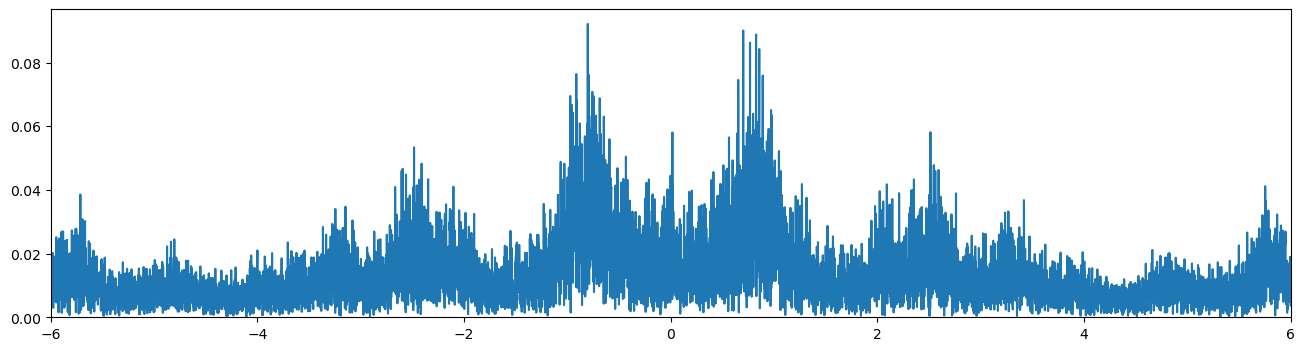

In [42]:
fig = plt.figure(figsize=(16,4))
# for i in range(len(kz)):
#     plt.axvline(x = kz[i], color = 'b')

plt.plot(om_tilde[:], P_k[:])    # NOTE:Phere we have used the fftshift to 
plt.ylim(0,)                                                                         #Shift the zero-frequency component to the center of the spectrum
plt.xlim(-6, 6)

plt.show()

In [43]:
P = np.exp(logP)
P_k_prime = np.fft.fftshift(P)[:,indx_k]#/D**2)

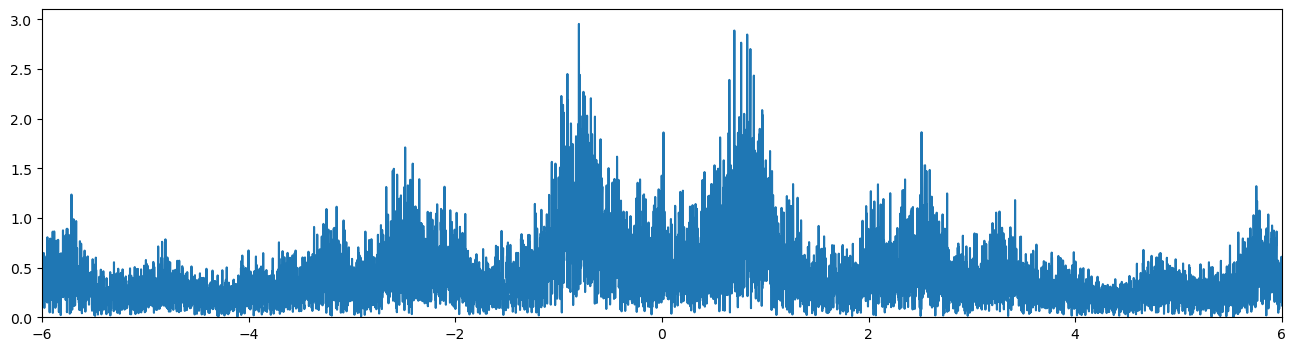

In [44]:
fig = plt.figure(figsize=(16,4))
# for i in range(len(kz)):
#     plt.axvline(x = kz[i], color = 'b')

plt.plot(om_tilde[:], P_k_prime[:])    # NOTE:Phere we have used the fftshift to 
plt.ylim(0,)                                                                         #Shift the zero-frequency component to the center of the spectrum
plt.xlim(-6, 6)

plt.show()